## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import timedelta
import scipy.stats as stats

In [3]:
pd.set_option("display.max_rows", None)

## Load the dataframe

In [4]:
df = pd.read_csv('data/all2022new_no_outlier.csv')
df = df.sort_values('finish_minutes', ascending=True)
df.head()

,bib,name,age,city,state,country,5k,10k,15k,20k,...,mean_at_42_2k,perc_decay_5k_to_10k,perc_decay_10k_to_15k,perc_decay_15k_to_20k,perc_decay_20k_to_21_1k,perc_decay_21_1k_to_25k,perc_decay_25k_to_30k,perc_decay_30k_to_35k,perc_decay_35k_to_40k,perc_decay_40k_to_42_2k
1414,4,"Chebet, Evans",33,Kapsabet,KEN,NaN,0:14:58,0:29:40,0:44:45,1:00:03,...,19.96,0.91,-0.55,-0.64,-0.12,-0.39,-0.51,-0.33,1.09,0.15
1415,5,"Cherono, Lawrence",33,Eldoret,KEN,NaN,0:14:58,0:29:40,0:44:45,1:00:02,...,19.94,0.91,-0.55,-0.61,-0.19,-0.39,-0.48,-0.36,0.86,0.00
5580,1,"Kipruto, Benson",31,Kapsabet,KEN,NaN,0:14:58,0:29:39,0:44:45,1:00:02,...,19.94,0.98,-0.61,-0.61,-0.16,-0.42,-0.46,-0.38,0.85,-0.06
3706,9,"Geay, Gabriel",25,Tampa,FL,USA,0:14:57,0:29:40,0:44:44,1:00:03,...,19.94,0.78,-0.50,-0.68,-0.12,-0.39,-0.51,-0.33,0.63,-0.20
5581,11,"Kiptanui, Eric",31,KEN,NaN,NaN,0:14:57,0:29:40,0:44:44,1:00:03,...,19.91,0.78,-0.50,-0.68,-0.12,-0.42,-0.46,-0.43,-0.04,-0.16


## Average Speed by Gender

In [5]:
avg_speed_by_gender = df.groupby('gender')['avg_pace_to_42.2k'].mean()
print(avg_speed_by_gender)

gender
female    11.011315
male      12.360649
Name: avg_pace_to_42.2k, dtype: float64


In [6]:
# Group the data by gender and calculate the average speed
avg_speed_by_gender = df.groupby('gender')['avg_pace_to_42.2k'].mean().reset_index()

# Create a bar chart with Plotly
fig = px.bar(avg_speed_by_gender, x='gender', y='avg_pace_to_42.2k', color='gender')

# Add the average speed value as text to each bar
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')

# Add the y-axis label inside the plot
fig.update_layout(yaxis_title='Average speed (km/h)', yaxis_zeroline=False, yaxis_tickprefix='', yaxis_ticksuffix='',
                  yaxis=dict(showticklabels=False, showgrid=False, showline=False),
                  annotations=[dict(text='Average speed (km/h)', x=0.5, y=-0.2, xref='paper', yref='paper',
                                    font=dict(size=14, color='white'), showarrow=False)])

fig.show()

## Create a distribution plot

In [7]:
df['datetime_finish'] = pd.to_datetime(df['datetime_finish'])

# calculate the fastest and slowest finish times
fastest_time = df['datetime_finish'].min()
slowest_time = df['datetime_finish'].max()

# create the histogram
fig = px.histogram(df, x='datetime_finish', nbins=int((slowest_time - fastest_time).seconds/600), range_x=[fastest_time, slowest_time])
fig.update_layout(title='Finish Times Histogram', xaxis_title='Finish Times', yaxis_title='Count',xaxis_tickformat='%H:%M')

fig.show()

## Create a distribution plot with Male / Female indicated

In [8]:
df['datetime_finish'] = pd.to_datetime(df['datetime_finish'])

# calculate the fastest and slowest finish times
fastest_time = df['datetime_finish'].min()
slowest_time = df['datetime_finish'].max()
mean_val = df['datetime_finish'].mean()
median_val = df['datetime_finish'].median()

# create the histogram
fig = px.histogram(df, x='datetime_finish', nbins=int((slowest_time - fastest_time).seconds/100), range_x=[fastest_time, slowest_time],labels={'datetime_finish':'duration hh:mm'},color="gender")
fig.update_layout(title='Distribution of Male / Female finishes (with mean indication in black dotted line)', xaxis_title=f"Finish Times (Mean : {mean_val:%H:%M:%S})", yaxis_title='Count of runners',xaxis_tickformat='%H:%M',bargap=0.1)

fig.add_vline(x=mean_val, line_dash="dash", line_color="black", name="Mean",line_width=3)

fig.show()

## T-test and U-test (is there a significant difference in means between males and females)

In [13]:
# Correlation between gender and finish time: You can test whether there is a significant difference in finish times between males and females using a t-test or Mann-Whitney U test. You can also calculate the correlation coefficient between gender and finish time for all runners to determine whether there is a significant gender effect on performance. You can use a box plot or violin plot to compare the distribution of finish times between males and females.

# convert 'delta_finish' to total minutes
df['delta_finish'] = pd.to_timedelta(df['delta_finish'])
df['delta_finish_minutes'] = df['delta_finish'].dt.total_seconds() / 60

# Separate finish times by gender
males = df[df['gender'] == 'male']['delta_finish_minutes']
females = df[df['gender'] == 'female']['delta_finish_minutes']

# Perform t-test to compare means of two independent samples
t, p = stats.ttest_ind(males, females)

# Perform Mann-Whitney U test to compare medians of two independent samples
u, p = stats.mannwhitneyu(males, females, alternative='two-sided')

# Print the results of the 2 tests
print("t-test: t = %.3f, p = %.3f" % (t, p))
print("Mann-Whitney U test: U = %.3f, p = %.3f" % (u, p))

# Result:
# t-test: t = -46.812, p = 0.000
# Mann-Whitney U test: U = 38588743.500, p = 0.000

# The results of the t-test and Mann-Whitney U test indicate that there is a statistically significant difference in finish times between males and females in your dataset.

# The t-test result (t = -46.812, p = 0.000) suggests that the means of the two groups are significantly different.

# The Mann-Whitney U test result (U = 38588743.500, p = 0.000) suggests that the distributions of the two groups are significantly different.

# In both tests, a p-value of 0.000 indicates strong evidence against the null hypothesis, which is that there’s no difference in finish times between males and females. Therefore, we reject the null hypothesis and conclude that there is a significant difference in finish times between males and females.

# Please note that these tests do not indicate which group (males or females) has faster or slower times on average. For that, you could look at the means or medians of the two groups. Let me know if you need further assistance! 😊

t-test: t = -46.812, p = 0.000
Mann-Whitney U test: U = 38588743.500, p = 0.000


## Correlation between gender and finish time

In [14]:
correlation = df["gender"].astype('category').cat.codes.corr(df["finish_minutes"])

print("Correlation coefficient: ", correlation)

# The correlation coefficient value of -0.2950 indicates a weak negative correlation between gender and finish time. This means that there is a small tendency for females to have slightly slower finish times compared to males, but this association is not very strong. 

Correlation coefficient:  -0.29501677152419786


<Axes: xlabel='gender', ylabel='finish_minutes'>

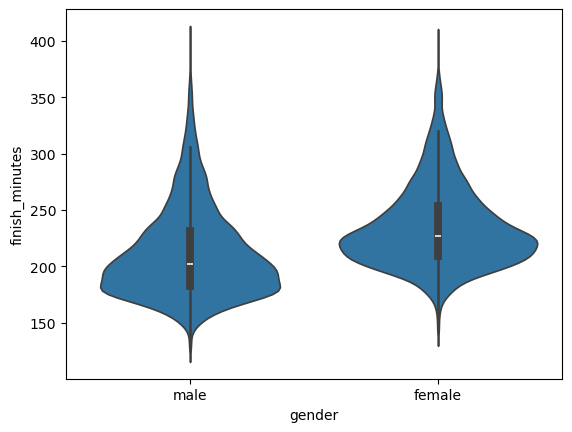

In [15]:
sns.violinplot(x="gender", y="finish_minutes", data=df)

# The higher position of the wide part of the female violin suggests that there may be more female runners with slower finish times compared to male runners. However, the taller and narrower shape of the male violin suggests that there are more male runners with faster finish times than females, and that the range of finish times for males is more tightly clustered around the mean.

## Distributions per age group

In [16]:
df['datetime_finish'] = pd.to_datetime(df['datetime_finish'])

df['age_group'] = df['age_group'].astype(str)

# calculate the fastest and slowest finish times
fastest_time = df['datetime_finish'].min()
slowest_time = df['datetime_finish'].max()
mean_val = df['datetime_finish'].mean()
median_val = df['datetime_finish'].median()

# create the subplot titles
subplot_titles = [f"Age Group: {age_group}" for age_group in df['age_group'].unique()]

# create the subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=subplot_titles, shared_yaxes=False, vertical_spacing=0.1, row_heights=None)

# add the histograms to the subplots
for i, age_group in enumerate(df['age_group'].unique()):
    df_age = df[df['age_group']==age_group]
    # "go histogram" leaves no room to remove the date in the plot
    fig.add_trace(go.Histogram(x=df_age['datetime_finish'], nbinsx=20, name=age_group), row=(i//2)+1, col=(i%2)+1)
    
# update the layout
fig.update_layout(height=1000,title_text='Finish Times by Age Group', xaxis_title_text='Finish Time (hh:mm:ss)', yaxis_title_text='Count')

# fig.add_vline(x=mean_val, line_dash="dash", line_color="black", name="Mean", line_width=3)

# show the figure
fig.show()

## Summary statistics of finish times (per gender)
### - Central Tendency (mean, median, mode)
### - Measures of variability (range, variance, standard deviation)

In [17]:
from datetime import timedelta

# Separate males and females
male_data = df[df['gender'] == 'male']['delta_finish']
female_data = df[df['gender'] == 'female']['delta_finish']

# Calculate means and standard deviations
male_mean, male_std = np.mean(male_data), np.std(male_data)
female_mean, female_std = np.mean(female_data), np.std(female_data)

print('overall mean finish time: ', df['delta_finish'].mean() )
print('male mean finish time: ', male_mean)
print('female mean finish time: ', female_mean)
print('male - female mean difference: ', (female_mean - male_mean))
print('male std: ', male_std)
print('female std: ', female_std)
print('male range', male_data.max() - male_data.min())
print('female range', female_data.max() - female_data.min())

overall mean finish time:  0 days 03:41:15.980686415
male mean finish time:  0 days 03:31:12.970865015
female mean finish time:  0 days 03:55:01.220688234
male - female mean difference:  0 days 00:23:48.249823219
male std:  0 days 00:39:16.131377930
female std:  0 days 00:36:23.192625232
male range 0 days 04:34:41
female range 0 days 04:17:56


## Confidence intervals

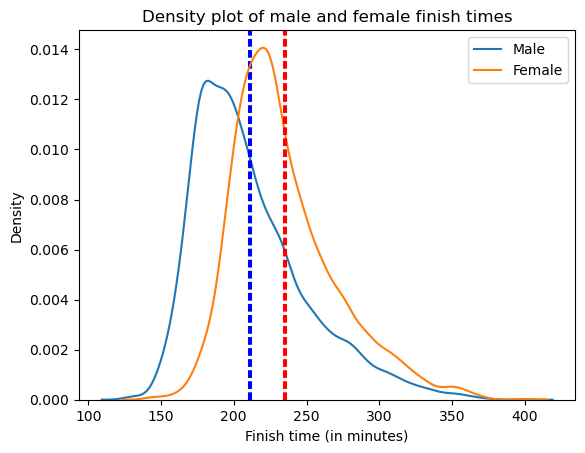

In [18]:
# Separate males and females
male_data_min = df[df['gender'] == 'male']['finish_minutes']
female_data_min = df[df['gender'] == 'female']['finish_minutes']

# Calculate means and standard deviations
male_min_mean, male_min_std = np.mean(male_data_min), np.std(male_data_min)
female_min_mean, female_min_std = np.mean(female_data_min), np.std(female_data_min)

# Set confidence level
confidence_level = 0.95

# Calculate confidence intervals
male_ci = stats.norm.interval(confidence_level, loc=male_min_mean, scale=male_min_std/np.sqrt(len(male_data_min)))
female_ci = stats.norm.interval(confidence_level, loc=female_min_mean, scale=female_min_std/np.sqrt(len(female_data_min)))

# Plot results
sns.kdeplot(data=male_data_min, label='Male')
plt.axvline(x=male_ci[0], color='blue', linestyle='--')
plt.axvline(x=male_ci[1], color='blue', linestyle='--')
sns.kdeplot(data=female_data_min, label='Female')
plt.axvline(x=female_ci[0], color='red', linestyle='--')
plt.axvline(x=female_ci[1], color='red', linestyle='--')
plt.xlabel('Finish time (in minutes)') # Add this line to set x-axis label
plt.title("Density plot of male and female finish times")
plt.legend()
plt.show()

# Female mean score (dotted line) is greater than men (as expected)
# A higher density score for women indicates that the distribution of finish times for women is more concentrated around the mean compared to men. 

## Correlation calculation

C:\Users\nico_\AppData\Local\Temp\ipykernel_17460\938121118.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



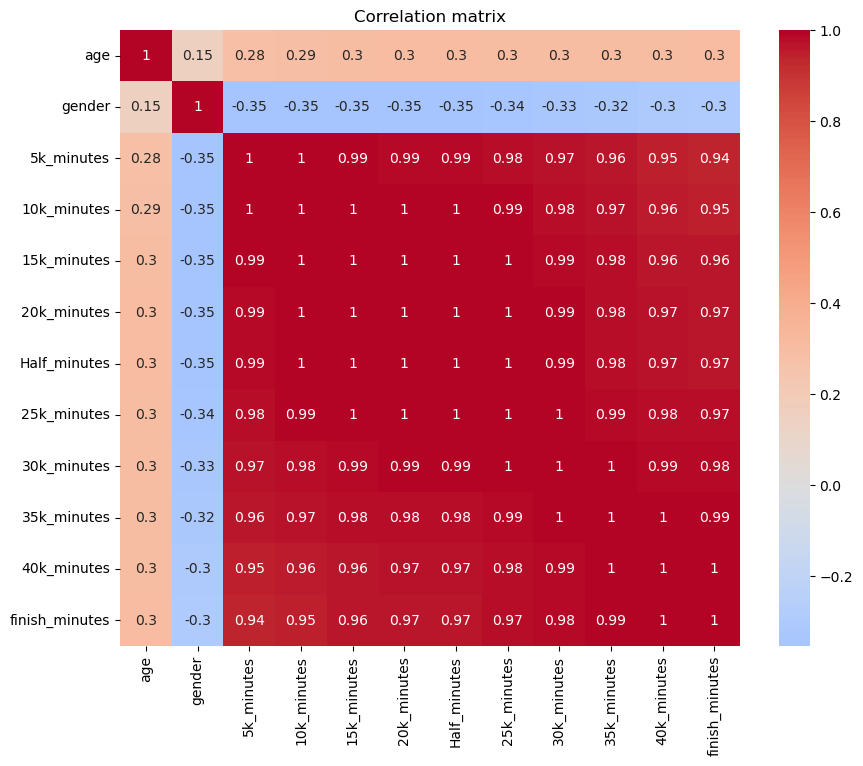

In [19]:
# Select relevant columns
cols = ['age', 'gender', '5k_minutes', '10k_minutes', '15k_minutes','20k_minutes', 'Half_minutes', '25k_minutes', '30k_minutes','35k_minutes', '40k_minutes', 'finish_minutes']


df_selected = df[cols]

# Convert gender to binary variable
df_selected['gender'] = df_selected['gender'].apply(lambda x: 1 if x == 'male' else 0)

# Calculate correlation matrix
corr_matrix = df_selected.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation matrix')
plt.show()

# The correlation between intermediate times and the finish time becomes increasingly stronger

## Probability challenge
### Probability that males or females aged 40-44 finishes the marathon within 3 hours

In [22]:
# Filter the data
male_data = df[(df['gender'] == 'male') & (df['age'].between(40, 44))]
female_data = df[(df['gender'] == 'female') & (df['age'].between(40, 44))]

# Calculate the probability of finishing the race within 3 hours
male_prob = sum(male_data['finish_minutes'] <= 180) / len(male_data)
female_prob = sum(female_data['finish_minutes'] <= 180) / len(female_data)

# Print the results
print("Male probability: ", male_prob)
print("Female probability: ", female_prob)

Male probability:  0.27190653212958044
Female probability:  0.013725490196078431


## Statistic fun fact 1: What is the optimal age for running a marathon (m/f). Data is based on the top 15 runners with that age.

In [26]:
# Separate dataframe by gender
df_male = df[df['gender'] == 'male']
df_female = df[df['gender'] == 'female']

# Initialize lists to store DataFrames temporarily
male_dfs = []
female_dfs = []

# Iterate through each age and get the top 15 fastest runners
for age in df['age'].unique():
    # Filter and get the top 15 fastest indices for each gender within each age group
    top_15_male = df_male[(df_male['age'] == age)].nsmallest(15, 'finish_minutes')
    top_15_female = df_female[(df_female['age'] == age)].nsmallest(15, 'finish_minutes')
    
    # Store DataFrames in lists
    male_dfs.append(top_15_male)
    female_dfs.append(top_15_female)

# Concatenate all DataFrames in the lists
df_male_top_15 = pd.concat(male_dfs, ignore_index=True)
df_female_top_15 = pd.concat(female_dfs, ignore_index=True)

# Print average km pace for male and female runners for each age group
for age in df['age'].unique():
    male_avg_pace = df_male_top_15[df_male_top_15['age'] == age]['finish_minutes'].mean() / 42.195
    female_avg_pace = df_female_top_15[df_female_top_15['age'] == age]['finish_minutes'].mean() / 42.195
    print(f"Age {age}: Male Average Pace = {male_avg_pace:.2f} min/km, Female Average Pace = {female_avg_pace:.2f} min/km")


Age 33: Male Average Pace = 3.40 min/km, Female Average Pace = 4.03 min/km
Age 31: Male Average Pace = 3.48 min/km, Female Average Pace = 4.19 min/km
Age 25: Male Average Pace = 3.52 min/km, Female Average Pace = 4.23 min/km
Age 28: Male Average Pace = 3.41 min/km, Female Average Pace = 3.89 min/km
Age 30: Male Average Pace = 3.47 min/km, Female Average Pace = 3.97 min/km
Age 38: Male Average Pace = 3.55 min/km, Female Average Pace = 4.17 min/km
Age 29: Male Average Pace = 3.52 min/km, Female Average Pace = 4.15 min/km
Age 27: Male Average Pace = 3.51 min/km, Female Average Pace = 4.13 min/km
Age 26: Male Average Pace = 3.45 min/km, Female Average Pace = 4.01 min/km
Age 35: Male Average Pace = 3.60 min/km, Female Average Pace = 4.15 min/km
Age 37: Male Average Pace = 3.68 min/km, Female Average Pace = 4.34 min/km
Age 42: Male Average Pace = 3.81 min/km, Female Average Pace = 4.29 min/km
Age 36: Male Average Pace = 3.63 min/km, Female Average Pace = 4.18 min/km
Age 32: Male Average Pace

In [28]:
# Remove rows from male top 15 and female top 15 for ages that do not have 15 finishers

df_male_top_15_2022 = df_male_top_15.groupby('age').filter(lambda x: len(x) >= 15)

df_female_top_15_2022 = df_female_top_15.groupby('age').filter(lambda x: len(x) >= 15)

In [29]:
# Calculate average pace for male and female runners for each age

df_male_top_15_mean_age_2022 = df_male_top_15_2022.groupby('age')['finish_minutes'].mean() / 42.195
df_female_top_15_mean_age_2022 = df_female_top_15_2022.groupby('age')['finish_minutes'].mean() / 42.195

# Create new dataframes with age and average pace columns
df_male_top_15_mean_age_2022 = pd.DataFrame({'age': df_male_top_15_mean_age_2022.index, 'avg_pace': df_male_top_15_mean_age_2022.values})
df_female_top_15_mean_age_2022 = pd.DataFrame({'age': df_female_top_15_mean_age_2022.index, 'avg_pace': df_female_top_15_mean_age_2022.values})

df_male_top_15_mean_age_2022.head()

,age,avg_pace
0,19,4.387186
1,20,4.200498
2,21,3.903701
3,22,3.678035
4,23,3.727709


In [30]:
df_male_top_15_mean_age_2022

,age,avg_pace
0,19,4.387186
1,20,4.200498
2,21,3.903701
3,22,3.678035
4,23,3.727709
5,24,3.633195
6,25,3.523767
7,26,3.447881
8,27,3.512691
9,28,3.407197


In [31]:
# Combine the male and female top 15 dataframes

df_gender_pace22 = pd.concat([df_male_top_15_mean_age_2022.assign(gender='Male'), df_female_top_15_mean_age_2022.assign(gender='Female')])

df_gender_pace22.head()

,age,avg_pace,gender
0,19,4.387186,Male
1,20,4.200498,Male
2,21,3.903701,Male
3,22,3.678035,Male
4,23,3.727709,Male


In [33]:
print(df_gender_pace22)

    age  avg_pace  gender
0    19  4.387186    Male
1    20  4.200498    Male
2    21  3.903701    Male
3    22  3.678035    Male
4    23  3.727709    Male
5    24  3.633195    Male
6    25  3.523767    Male
7    26  3.447881    Male
8    27  3.512691    Male
9    28  3.407197    Male
10   29  3.516388    Male
11   30  3.469542    Male
12   31  3.476541    Male
13   32  3.533547    Male
14   33  3.403057    Male
15   34  3.669455    Male
16   35  3.596271    Male
17   36  3.625311    Male
18   37  3.681005    Male
19   38  3.552727    Male
20   39  3.702714    Male
21   40  3.724549    Male
22   41  3.722179    Male
23   42  3.805917    Male
24   43  3.865798    Male
25   44  3.741075    Male
26   45  3.826425    Male
27   46  3.866619    Male
28   47  3.885990    Male
29   48  4.073516    Male
30   49  4.023257    Male
31   50  3.940467    Male
32   51  4.061066    Male
33   52  4.015815    Male
34   53  4.130790    Male
35   54  4.142292    Male
36   55  4.115590    Male
37   56  4.3

## Save df_gender_pace22.csv

In [26]:
df_gender_pace22.to_csv('df_gender_pace22.csv', index=False)

In [27]:
df_male_top_15_2022.to_csv('df_male_top_15_22.csv', index=False)
df_female_top_15_2022.to_csv('df_female_top_15_22.csv', index=False)
df_male_top_15_mean_age_2022.to_csv('df_male_top_15_mean_age_22.csv', index=False)
df_female_top_15_mean_age_2022.to_csv('df_female_top_15_mean_age_22.csv', index=False)

## Plot male/female pace

In [34]:
# Create the interactive line plot with Plotly Express
fig = px.line(df_gender_pace22, x='age', y='avg_pace', color='gender',
              title='Average Marathon Pace by Age and Gender',
              labels={'age': 'Age', 'avg_pace': 'Average Pace (min/km)'})
fig.update_yaxes(dtick=0.5) # Set y-axis step to 0.5
fig.update_xaxes(dtick=5) # Set x-axis step to 5
fig.update_layout(yaxis=dict(range=[3, df_gender_pace22['avg_pace'].max()])) # Set y-axis range and start from 3
fig.show()

## Smoothen the curve

In [29]:
# Reset the index of the DataFrame
df_gender_pace22.reset_index(drop=True, inplace=True)

# Calculate the rolling mean of the data
rolling_mean = df_gender_pace22.groupby('gender')['avg_pace'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Add the smoothed data to the dataframe
df_gender_pace22['smoothed_avg_pace'] = rolling_mean
df_gender_pace22['smoothed_avg_pace'].fillna(df_gender_pace22['avg_pace'], inplace=True)

## Adjust women finish times for male/female diff using age range 27-33 years as a benchmark

In [31]:
# let's set a benchmark 
# males aged 27-33 can run a km on average under 3.5 minutes
benchmark_m = df_gender_pace22[(df_gender_pace22['age'] >= 27) & (df_gender_pace22['age'] <= 33) & (df_gender_pace22['gender'] == 'Male')]['smoothed_avg_pace'].mean()
benchmark_f = df_gender_pace22[(df_gender_pace22['age'] >= 27) & (df_gender_pace22['age'] <= 33) & (df_gender_pace22['gender'] == 'Female')]['smoothed_avg_pace'].mean()
print(benchmark_m, benchmark_f)

diff_m_f = benchmark_m - benchmark_f
print('difference: ',diff_m_f)

tim_cor_f_tot = round(diff_m_f * 42.195,2)
print('time correction for women: ',tim_cor_f_tot, ' minutes')

3.477940852843093 4.076012165738437
difference:  -0.5980713128953439
time correction for women:  -25.24  minutes


In [32]:
# improve women's pace by 0.5980 to level male advantage

df_gender_pace22['fem_corr'] = np.where(df_gender_pace22['gender'] == 'Female', df_gender_pace22['smoothed_avg_pace'] + [diff_m_f], df_gender_pace22['smoothed_avg_pace'])

# sort the dataframe by age and gender
df_gender_pace22.sort_values(['gender', 'age'], inplace=True)

# create a new column with the shifted average pace values
df_gender_pace22['next_avg_pace'] = df_gender_pace22.groupby('gender')['avg_pace'].shift(-1)

# calculate the relative difference between the two columns
df_gender_pace22['rel_diff'] = (df_gender_pace22['next_avg_pace'] - df_gender_pace22['avg_pace']) / df_gender_pace22['avg_pace']

# group the dataframe by gender and calculate the cumulative sum of the rel_diff column
df_gender_pace22['rel_diff_sum'] = df_gender_pace22.groupby('gender')['rel_diff'].cumsum()

# Calculate the fastest pace for each gender
fastest_pace = df_gender_pace22.groupby('gender')['avg_pace'].min()

df_gender_pace22['rel_diff_speed'] = (df_gender_pace22['avg_pace'] - df_gender_pace22['gender'].map(fastest_pace)) / df_gender_pace22['gender'].map(fastest_pace) * 100

In [39]:
df_gender_pace22.head()

,age,avg_pace,gender,smoothed_avg_pace,fem_corr,next_avg_pace,rel_diff,rel_diff_sum,rel_diff_speed
56,21,4.896489,Female,4.896489,4.298417,4.474954,-0.086089,-0.086089,25.951409
57,22,4.474954,Female,4.474954,3.876882,4.251562,-0.049920,-0.136010,15.108349
58,23,4.251562,Female,4.541001,3.942930,4.150934,-0.023668,-0.159678,9.362096
59,24,4.150934,Female,4.292483,3.694412,4.231718,0.019462,-0.140217,6.773661
60,25,4.231718,Female,4.211405,3.613333,4.011407,-0.052062,-0.192278,8.851644


In [33]:
df_gender_pace22.to_csv('df_gender_pace22.csv', index=False)

## Draw smoothened curve

In [35]:
# Create the interactive line plot with Plotly Express using the smoothed data
fig = px.line(df_gender_pace22, x='age', y='smoothed_avg_pace', color='gender',
              title='Average Marathon Pace by Age and Gender (smoothend curve) with rolling avg',
              labels={'age': 'Age', 'smoothed_avg_pace': 'Smoothed Average Pace (min/km)'})
fig.update_yaxes(dtick=0.5) # Set y-axis step to 0.5
fig.update_xaxes(dtick=5) # Set x-axis step to 5
fig.update_layout(yaxis=dict(range=[3, df_gender_pace22['avg_pace'].max()])) # Set y-axis range and start from 3
fig.show()

## Draw male/female adjusted curve

In [36]:
# Create the interactive line plot with Plotly Express using the smoothed data
fig = px.line(df_gender_pace22, x='age', y='fem_corr', color='gender',
              title='Average Marathon Pace by Age and Gender (smoothend curve) with rolling avg',
              labels={'age': 'Age', 'smoothed_avg_pace': 'Smoothed Average Pace (min/km)'})
fig.update_yaxes(dtick=0.5) # Set y-axis step to 0.5
fig.update_xaxes(dtick=5) # Set x-axis step to 5
fig.update_layout(yaxis=dict(range=[3, df_gender_pace22['avg_pace'].max()])) # Set y-axis range and start from 3
fig.show()

### Test for Comparison

In [5]:
df_22 = pd.read_csv('Dataset 2022/all2022new_no_outlier.csv')
df_22 = df_22.sort_values('finish_minutes', ascending=True)

In [6]:
df_23 = pd.read_csv('Dataset 2023/all2023new_no_outlier.csv')
df_23 = df_23.sort_values('finish_minutes', ascending=True)

In [8]:
df_23.head()

,bib,age,age_group,gender,5k_minutes,10k_minutes,15k_minutes,20k_minutes,Half_minutes,25k_minutes,...,mean_at_42_2k,perc_decay_5k_to_10k,perc_decay_10k_to_15k,perc_decay_15k_to_20k,perc_decay_20k_to_21_1k,perc_decay_21_1k_to_25k,perc_decay_25k_to_30k,perc_decay_30k_to_35k,perc_decay_35k_to_40k,perc_decay_40k_to_42_2k
0,1,34,1,male,14.30,28.88,43.95,59.03,62.33,74.08,...,20.36,-0.97,-1.43,-0.73,-0.09,-0.31,-0.56,-0.02,-0.01,-0.10
1,3,26,1,male,14.30,28.87,43.95,59.03,62.33,74.07,...,20.36,-0.94,-1.47,-0.73,-0.09,-0.30,-0.55,-0.05,-0.01,-0.22
2,5,32,1,male,14.28,28.87,43.95,59.03,62.32,74.08,...,20.36,-1.07,-1.47,-0.73,-0.07,-0.33,-0.56,-0.02,-0.01,-0.26
3,19,29,1,male,14.28,28.88,43.95,59.03,62.33,74.10,...,20.28,-1.11,-1.43,-0.73,-0.09,-0.34,-0.54,-0.92,-0.57,-0.30
4,31,28,1,male,14.32,28.90,43.97,59.03,62.33,74.13,...,20.25,-0.90,-1.41,-0.68,-0.09,-0.38,-0.91,-0.73,-0.54,-0.55


In [9]:
columns = ['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', '30k_minutes', '35k_minutes',
       '40k_minutes', 'gender_F', 'gender_M', 'finish_minutes', 'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
       'avg_pace_to_30k', 'avg_pace_to_35k', 'avg_pace_to_40k',
       'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'std_at_35k', 'std_at_40k',
       'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'mean_at_30k', 'mean_at_35k', 'mean_at_40k',
       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k',
       'perc_decay_30k_to_35k', 'perc_decay_35k_to_40k']

In [13]:
df_23 = df_23.rename(columns={'avg_pace_to_5k.1': 'avg_pace_to_35k'})

In [10]:
df_22 = df_22[columns]

In [14]:
df_23 = df_23[columns]

In [66]:
df_22.head()

,bib,age,5k_minutes,10k_minutes,15k_minutes,20k_minutes,Half_minutes,25k_minutes,30k_minutes,35k_minutes,...,mean_at_35k,mean_at_40k,perc_decay_5k_to_10k,perc_decay_10k_to_15k,perc_decay_15k_to_20k,perc_decay_20k_to_21_1k,perc_decay_21_1k_to_25k,perc_decay_25k_to_30k,perc_decay_30k_to_35k,perc_decay_35k_to_40k
1414,4,33,14.97,29.67,44.75,60.05,63.43,75.45,91.00,106.52,...,19.96,19.96,0.91,-0.55,-0.64,-0.12,-0.39,-0.51,-0.33,1.09
1415,5,33,14.97,29.67,44.75,60.03,63.45,75.47,91.00,106.55,...,19.96,19.95,0.91,-0.55,-0.61,-0.19,-0.39,-0.48,-0.36,0.86
5580,1,31,14.97,29.65,44.75,60.03,63.43,75.47,90.98,106.55,...,19.96,19.95,0.98,-0.61,-0.61,-0.16,-0.42,-0.46,-0.38,0.85
3706,9,25,14.95,29.67,44.73,60.05,63.43,75.45,91.00,106.52,...,19.96,19.95,0.78,-0.50,-0.68,-0.12,-0.39,-0.51,-0.33,0.63
5581,11,31,14.95,29.67,44.73,60.05,63.43,75.47,90.98,106.60,...,19.96,19.93,0.78,-0.50,-0.68,-0.12,-0.42,-0.46,-0.43,-0.04


In [15]:
df_22.to_excel('df_22_ai.xlsx', index=False)
df_23.to_excel('df_23_ai.xlsx', index=False)